In [1]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import shutil
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
!pip install wandb -qU
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
# manual_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
# ])

manual_transforms = transforms.ToTensor()

In [5]:
#rename root and test dirs based on dataset
root_dir = '/content/fmnist_train_data'

os.makedirs(root_dir, exist_ok=True)
# change the range to number of classes in dataset
for i in range(10):
    os.makedirs(os.path.join(root_dir, str(i)), exist_ok=True)

In [6]:
trainset = torchvision.datasets.FashionMNIST(root=root_dir, train=True, download=True, transform=manual_transforms)
trainloader = DataLoader(trainset, batch_size=1, shuffle=True)

100%|██████████| 26421880/26421880 [00:06<00:00, 3895944.13it/s]


Extracting /content/fmnist_train_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/fmnist_train_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 162963.27it/s]


Extracting /content/fmnist_train_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/fmnist_train_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3188799.60it/s]


Extracting /content/fmnist_train_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/fmnist_train_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5848395.72it/s]

Extracting /content/fmnist_train_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/fmnist_train_data/FashionMNIST/raw



In [7]:
class_names = trainset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
def save_images_to_folders(dataset, root_dir):
    for idx, (image, label) in enumerate(tqdm(dataset)):
        label_dir = os.path.join(root_dir, str(label))
        img_path = os.path.join(label_dir, f'{idx}.png')
        torchvision.utils.save_image(image, img_path)

In [9]:
save_images_to_folders(trainset, root_dir)

100%|██████████| 60000/60000 [00:41<00:00, 1443.52it/s]


In [10]:
shutil.rmtree('/content/fmnist_train_data/FashionMNIST')
# os.remove('/content/cifar100_train_data/cifar-100-python.tar.gz')

In [11]:
test_dir = '/content/fmnist_test_data'
os.makedirs(test_dir, exist_ok=True)
for i in range(10):
    os.makedirs(os.path.join(test_dir, str(i)), exist_ok=True)

testset = torchvision.datasets.FashionMNIST(root=test_dir, train=False, download=True, transform=manual_transforms)
testloader = DataLoader(trainset, batch_size=1, shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 10863406.10it/s]


Extracting /content/fmnist_test_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/fmnist_test_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 163533.53it/s]


Extracting /content/fmnist_test_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/fmnist_test_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3100550.72it/s]


Extracting /content/fmnist_test_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/fmnist_test_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6896287.76it/s]

Extracting /content/fmnist_test_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/fmnist_test_data/FashionMNIST/raw



In [12]:
save_images_to_folders(testset, test_dir)

100%|██████████| 10000/10000 [00:06<00:00, 1454.07it/s]


In [13]:
shutil.rmtree('/content/fmnist_test_data/FashionMNIST')
# os.remove('/content/cifar100_test_data/cifar-100-python.tar.gz')

In [14]:
import os
import pandas as pd

# initialise annotation file names here

train_annotation = 'annotations_fashion_train.csv'
test_annotation = 'annotations_fashion_test.csv'

def create_annotations_csv(root_dir, output_file):
    data = []

    for label in os.listdir(root_dir):
        label_dir = os.path.join(root_dir, label)
        if os.path.isdir(label_dir):
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                if os.path.isfile(file_path):
                    data.append([f"{label}/{file_name}", label])

    df = pd.DataFrame(data, columns=['filepath', 'label'])

    df.to_csv(output_file, index=False)

    print(f"{output_file} file created successfully.")

create_annotations_csv(root_dir, train_annotation)
create_annotations_csv(test_dir, test_annotation)

annotations_fashion_train.csv file created successfully.
annotations_fashion_test.csv file created successfully.


In [15]:
config = {
    "learning_rate": 0.01,
    "batch_size": 64,
    "epochs": 5,
}

In [16]:
project_name = 'Confusion Matrix Experiments'
run_name = 'FashionMNIST - swap tshirt to shirt'
github_url_base = 'https://github.com/Aadharsh1/ML-Deep-Learning/blob/main/Weights_Biases'
file_name = f'{run_name}.ipynb'
notebook_link = f'{github_url_base}/{project_name}/{file_name}'

run = wandb.init(
    project=project_name,
    name=run_name,
    notes=notebook_link,
    config=config,
    )

annotations_path = f'/content/{train_annotation}'
labels_at = wandb.Artifact(f"{train_annotation}", type="dataset")
labels_at.add_reference(f'file://{annotations_path}')
run.log_artifact(labels_at)

# annotations_path = f'/content/{test_annotation}'
# labels_at = wandb.Artifact(f"{test_annotation}", type="dataset")
# labels_at.add_reference(f'file://{annotations_path}')
# run.log_artifact(labels_at)

wandb: Currently logged in as: aadharshr-2022 (aadharshr-2022-Singapore Management University). Use `wandb login --relogin` to force relogin


<Artifact annotations_fashion_train.csv>

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import pandas as pd
from PIL import Image

class NewDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        #remeber to change 'RGB' to 'L' for greyscale images and vice versa
        image = Image.open(img_path).convert("L")
        label = int(self.img_labels.iloc[idx, 1])
        if self.transform:
            image = self.transform(image)
        return image, label, img_path

In [18]:
train_dataset = NewDataset(annotations_file=f'/content/{train_annotation}', img_dir=root_dir, transform=manual_transforms)
test_dataset = NewDataset(annotations_file=f'/content/{test_annotation}', img_dir=test_dir, transform=manual_transforms)


In [19]:
# from torch.utils.data import DataLoader, random_split
# calibration_size = int(0.02*len(train_dataset))
# remaining_size = len(train_dataset) - calibration_size
# calibration_set, train_set = random_split(train_dataset, [calibration_size, remaining_size])


In [20]:
train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
# calib_loader = DataLoader(calibration_set, batch_size=config["batch_size"], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=config["batch_size"], shuffle=False)

In [21]:
class model1(nn.Module):
  def __init__(self, in_shape, hidden_units, out_shape):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(490, out_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

model = model1(1, 10, 10).to(device)

In [22]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=config['learning_rate'])

def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [23]:
from tqdm.auto import tqdm
def train_function(model, device, train_dataloader, loss_function, optimizer):
  model.train()
  model = model.to(device)
  training_loss = 0
  trng_acc = 0
  for X_train, y_train, img_path in tqdm(train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_train_logits = model(X_train)
    loss = loss_function(y_train_logits, y_train)
    training_loss += loss
    trng_acc += accuracy_function(y_train, torch.argmax(y_train_logits, dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # find average loss per batch
  return (training_loss/len(train_dataloader), trng_acc/len(train_dataloader))


def validate_function(model, device, validation_dataloader, loss_function, accuracy_function):
  model.eval()
  model = model.to(device)
  validation_loss = 0
  validation_acc = 0

  with torch.inference_mode():
    for X_val, y_val, img_path in tqdm(validation_dataloader):
      X_val , y_val = X_val.to(device), y_val.to(device)
      val_logits = model(X_val)
      val_pred = torch.argmax(val_logits, dim=1)
      validation_acc += accuracy_function(y_val, val_pred)
      validation_loss += loss_function(val_logits, y_val)
  return validation_loss/len(validation_dataloader), validation_acc/len(validation_dataloader)

In [24]:
epochs = config['epochs']
for epoch in range(epochs):
  train_loss, trng_acc = train_function(model, device, train_loader, loss_fn, optimizer)
  val_loss, val_acc = validate_function(model, device, test_loader, loss_fn, accuracy_function)
  wandb.log({
        'training_loss': train_loss,
        'training_accuracy': trng_acc
        # ,
        # 'test_loss': val_loss,
        # 'test_accuracy': val_acc
    })
  print(f'Epoch {epoch+1}: Training Loss: {train_loss:.4f}, Training Accuracy: {trng_acc:.4f}, Testing Loss: {val_loss}, Test Accuracy: {val_acc} ')

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 1: Training Loss: 1.4081, Training Accuracy: 50.3398, Testing Loss: 0.9378906488418579, Test Accuracy: 63.93312101910828 


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2: Training Loss: 0.6348, Training Accuracy: 77.4520, Testing Loss: 0.5806471109390259, Test Accuracy: 79.72730891719745 


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 3: Training Loss: 0.5227, Training Accuracy: 81.3150, Testing Loss: 0.52202308177948, Test Accuracy: 80.90167197452229 


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4: Training Loss: 0.4671, Training Accuracy: 83.3072, Testing Loss: 0.5913457870483398, Test Accuracy: 78.5031847133758 


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 5: Training Loss: 0.4341, Training Accuracy: 84.6215, Testing Loss: 0.45788058638572693, Test Accuracy: 83.1906847133758 


In [25]:
train_loader1 = DataLoader(train_dataset, batch_size=1, shuffle=True)

In [26]:
y_preds = []
y_true = []

model.eval()
with torch.inference_mode():
  for img, label, _ in tqdm(train_loader1):
    img, label = img.to(device), label.to(device)
    outputs = model(img)
    _, pred = torch.max(outputs, dim=1)
    y_preds.append(pred.item())
    y_true.append(label.item())

  0%|          | 0/60000 [00:00<?, ?it/s]

In [27]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 14.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

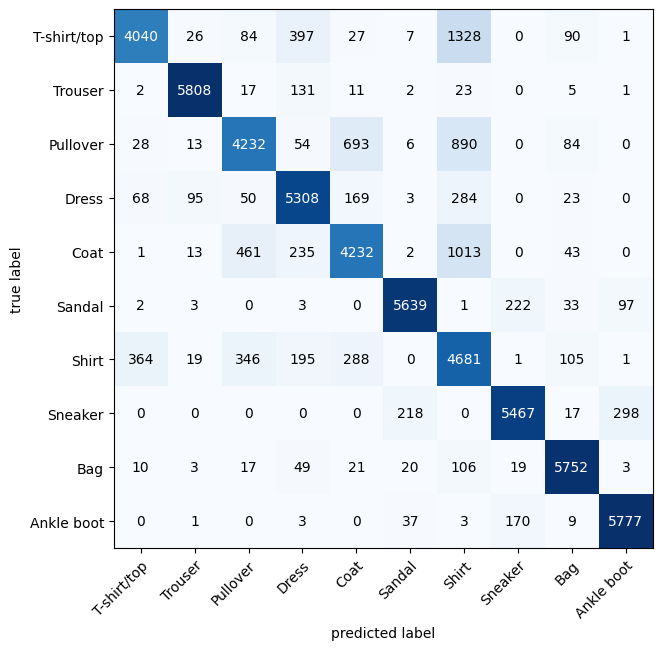

In [28]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=torch.tensor(y_preds),
                         target=torch.tensor(y_true))


fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);

In [29]:
wandb.log({
    'confusion_matrix_before': wandb.Image(fig)
})

In [30]:
import shutil
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

# Create directories for misclassified images
os.makedirs('/content/fmnist_train_data/misclassified_tshirt_as_shirt', exist_ok=True)
# os.makedirs('/content/fashion_train_data/misclassified_shirt_as_tshirt', exist_ok=True)


In [31]:
tshirt_index = 0
shirt_index = 6

In [32]:
model.eval()
with torch.no_grad():
    for images, labels, paths in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        for img, true_label, pred_label, img_path in zip(images, labels, predicted, paths):
            if true_label.item() == tshirt_index and pred_label.item() == shirt_index:
                shutil.move(img_path, '/content/fmnist_train_data/misclassified_tshirt_as_shirt')
            # elif true_label.item() == shirt_index and pred_label.item() == tshirt_index:
            #     shutil.move(img_path, '/content/fashion_train_data/misclassified_shirt_as_tshirt')


In [43]:
len(os.listdir('/content/fmnist_train_data/misclassified_tshirt_as_shirt'))

1328

In [44]:
create_annotations_csv(root_dir, 'train_annotations_updated')

train_annotations_updated file created successfully.


In [45]:
import pandas as pd

df = pd.read_csv('/content/train_annotations_updated', header=None, names=['image_path', 'label'])

df.loc[df['label'] == 'misclassified_tshirt_as_shirt', 'label'] = shirt_index

df.to_csv('updated_file.csv', index=False, header=False)


In [54]:
#load in training data again with new annotation file
new_train_dataset = NewDataset(annotations_file=f'/content/updated_file.csv', img_dir=root_dir, transform=manual_transforms)

In [55]:
new_train_loader = DataLoader(new_train_dataset, batch_size=config["batch_size"], shuffle=True)

In [56]:
model2 = model1(1, 10, 10).to(device)

In [57]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model2.parameters(), lr=config['learning_rate'])

def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [58]:
epochs = config['epochs']
for epoch in range(epochs):
  train_loss, trng_acc = train_function(model2, device, new_train_loader, loss_fn, optimizer)
  wandb.log({
        'new_raining_loss': train_loss,
        'new_training_accuracy': trng_acc
        # ,
        # 'test_loss': val_loss,
        # 'test_accuracy': val_acc
    })
  print(f'Epoch {epoch+1}: Training Loss: {train_loss:.4f}, Training Accuracy: {trng_acc:.4f}')

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1: Training Loss: 1.7235, Training Accuracy: 35.4428


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 2: Training Loss: 0.7224, Training Accuracy: 73.9372


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3: Training Loss: 0.5701, Training Accuracy: 79.4809


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4: Training Loss: 0.4728, Training Accuracy: 83.1440


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5: Training Loss: 0.4233, Training Accuracy: 85.1629


In [59]:
train_loader2 = DataLoader(new_train_dataset, batch_size=1, shuffle=True)

In [60]:
y_preds = []
y_true = []

model2.eval()
with torch.inference_mode():
  for img, label, _ in tqdm(train_loader2):
    img, label = img.to(device), label.to(device)
    outputs = model2(img)
    _, pred = torch.max(outputs, dim=1)
    y_preds.append(pred.item())
    y_true.append(label.item())

  0%|          | 0/60000 [00:00<?, ?it/s]

In [ ]:
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=torch.tensor(y_preds),
                         target=torch.tensor(y_true))


fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);

In [ ]:
wandb.log({
    'confusion_matrix_after': wandb.Image(fig)
})

In [ ]:
project_name = wandb.run.project
run_name = wandb.run.name
# change notebook name according to name of current notebook
notebook_path = '/content/drive/MyDrive/Colab Notebooks/fmnist_annotations.ipynb'

In [ ]:
url_path = '/content/drive/MyDrive/github_url.txt'
with open(url_path, 'r') as file:
    github_url = file.read().strip()

In [ ]:
import os
import subprocess
import shutil
directory = project_name
file_name = f"{run_name}.ipynb"
file_path = os.path.join('/content/ML-Deep-Learning/Weights_Biases', directory, file_name)

In [ ]:
#shutil.rmtree('/content/ML-Deep-Learning')

In [ ]:
repo_path = '/content/ML-Deep-Learning'
if not os.path.exists(repo_path):
    subprocess.run(["git", "clone", github_url, repo_path])

os.chdir(repo_path)

In [ ]:
project_directory = os.path.join('Weights_Biases', directory)
if not os.path.exists(project_directory):
    os.makedirs(project_directory)
    print(f"Directory '{project_directory}' created.")
else:
    print(f"Directory '{project_directory}' already exists.")

Directory 'Weights_Biases/Conformal Prediction Experiments' already exists.


In [ ]:
shutil.copyfile(notebook_path, file_path)

'/content/ML-Deep-Learning/Weights_Biases/Conformal Prediction Experiments/CIFAR100 run.ipynb'

In [ ]:
!git config --global user.email "aadharshrajagopal1@gmail.com"
!git config --global user.name "Aadharsh1"
!git remote set-url origin {github_url}

In [68]:
wandb.finish()

new_raining_loss,▁▁▄▂█▃▂▁▁
new_training_accuracy,██▅▇▁▆▇██
training_accuracy,▁▆▇██
training_loss,█▃▂▁▁
new_raining_loss,0.43833
new_training_accuracy,84.54658
training_accuracy,84.12513
training_loss,0.4412


In [ ]:
!cd /content/ML-Deep-Learning/Weights_Biases

In [ ]:
!git add .

In [ ]:
!git commit -m "Add notebook"

[main 6432c48] Add notebook
 1 file changed, 1 insertion(+)
 create mode 100644 Weights_Biases/Conformal Prediction Experiments/CIFAR100 run.ipynb


In [ ]:
!git push origin main

Enumerating objects: 8, done.
Counting objects: 100% (8/8), done.
Delta compression using up to 12 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 422.32 KiB | 11.41 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Aadharsh1/ML-Deep-Learning.git
   c709609..6432c48  main -> main
